# PSTAT 100 Final Project: Spatiotemporal Trends in Happiness
*Contributors: Dannah Golich, Dylan Fu, Rohit Viswanathan, Shogo Moridaira*

## Data Description
The World Happiness Report dataset is a collection of publicly-available data on happiness and socioeconomic factors worldwide. The data was aggregated from a number of different sources -- The Gallup World Poll, World Bank's Global Economic Prospects, and the WHO's Global Health Observatory. Some features are the national average of all observations if summarization was necessary. The features include log GDP, lifespan, perception of corruption, level of social support, freedom to make choices, happiness as measured by life ladder, positive affect, and negative affect.

## Question of Interest
Our primary question is: What are the spatiotemporal trends in happiness from 2008 to 2022? As such, we have identified three subquestions to tackle in answering our question: To what extent have global happiness and well-being levels changed between 2008 and 2023, and how do these changes vary across different countries and regions? What factors have contributed to these trends? 

A satisfactory answer will identify and analyze any existing trends across time or space, while also determining if any of the measured features have a significant effect on happiness. 

## Data Analysis 
### Preliminary Steps
To begin our analysis, we will first load in relevant python packages for analysis, read in the dataset, and look at basic dataset properties.

In [3]:
import pandas as pd
import altair as alt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [4]:
happy = pd.read_csv("./data/whr-2023.csv")
happy.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [3]:
print(f"happy dataset contains {happy.shape[0]} rows and {happy.shape[1]} columns\n")
print(f"{len(happy['Country name'].unique())} Countries contained in dataset: \n{happy['Country name'].unique()}")

happy dataset contains 2199 rows and 11 columns

165 Countries contained in dataset: 
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'L

#### Revlevant Variables for Analysis
As shown above, there are 11 variables that make up this dataset. Some variables are predictors of happiness (Generosity, life expectancy, log(GDP), Social Support, Freedom, Corruption), and others are measurements of happiness (Positive/Negative affect, Life Ladder). The Life Ladder value represents the satisfaction the respondent has with their life on a scale from 1 to 10. The positive/negative affect value quantifies the average frequency and intensity of positive/negative emotions or experiences reported by the people who took the survey. To determine overall happiness, we will use the Life Ladder value as the main measurement of overall happiness.

The following data analysis is organized by each subquestion.

### Changes in Global Happiness Over Time
#### 1. Split Dataset By Year 
First, we will generate year specific datasets for comparison across time. Additionally, we define functions that will be used to obtain means of variables across each individual year dataset.

In [7]:
#Splitting the dataset into multiple based on the year
years = np.unique(happy['year'])
year_dict = {}
for year in years:
    year_dict[year] = happy.loc[happy['year']==int(year)]

#Function to find the means of a particular shared column across all the newly created datasets.
def mean_of_each_year(dataset, columns):
    means = [dataset[col].mean() for col in columns]
    return means

#Function to gather all the data and make it into a dataframe ()
def create_new_data_frame_means(column):
    year = 2008
    column_to_graph = []
    all_years = []
    while year != 2023:
        column_to_graph.append(mean_of_each_year(year_dict[year], [column]))
        all_years.append(year)
        year+=1
    means_data_frame = pd.DataFrame({"Years": all_years,
           "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)
    means_data_frame["Diffs of Means"] = means_data_frame["Means"].diff()
    return means_data_frame

# for example, dataset with 2008 data
year_dict[2008]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.50,0.718,0.168,0.882,0.414,0.258
45,Argentina,2008,5.961,10.043,0.892,66.06,0.678,-0.135,0.865,0.720,0.318
62,Armenia,2008,4.652,9.230,0.709,64.32,0.462,-0.216,0.876,0.486,0.385
78,Australia,2008,7.254,10.709,0.947,70.04,0.916,0.302,0.431,0.729,0.218
93,Austria,2008,7.181,10.881,0.935,69.70,0.879,0.287,0.614,0.716,0.173
...,...,...,...,...,...,...,...,...,...,...,...
2106,Uzbekistan,2008,5.311,8.402,0.894,61.82,0.831,-0.030,NaN,0.647,0.187
2123,Venezuela,2008,6.258,9.719,0.922,65.38,0.678,-0.230,0.776,0.818,0.224
2140,Vietnam,2008,5.480,8.658,0.805,64.34,0.889,0.182,0.789,0.624,0.218
2169,Zambia,2008,4.730,7.918,0.624,48.08,0.717,0.054,0.890,0.707,0.206


#### 2. Change in Life Ladder Over the Years
Now that we have our individual datasets by year, we will compare the mean Life Ladder score across time.

In [8]:
# Graphing mean life ladder score for each year
graph_life_ladder = alt.Chart(create_new_data_frame_means("Life Ladder")).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Means:Q", title = "Mean Satisfaction Score")
).properties(
    title = "Mean Satisfaction Score Across the World over the Years",
)
# Graphing differences in mean life ladder score 
graph_life_ladder_diffs = alt.Chart(create_new_data_frame_means("Life Ladder")).mark_bar().encode(
    x='Years:O',
    y=alt.Y("Diffs of Means:Q", title = "Differences in Mean Satisfaction Score")
).properties(
    title = "Differences between Mean Satisfaction Score Across the World over the Years",
)
graph_life_ladder | graph_life_ladder_diffs

/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)
/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)


alt.HConcatChart(...)

The mean Life Ladder score has been consistently between 5 and 6 since 2008. There are some slight fluctuations but the mean never significantly increases or decreases. Something interesting is the fact that the highest mean score came in 2020, despite the Covid-19 pandemic beginning that year around the world. The second graph indicates the differences in mean between each year and the last. It is clear that there is no consistent trend. However, the steepest drop comes in 2021. It is possible that this was the year that people saw their overall satisfaction decrease, at the height of the pandemic.

#### 3. Positive and Negative Affects
We will perform similar analysis on the Positive and Negative affect scores over time.

In [9]:
# mean positive affect each year
graph_pos = alt.Chart(create_new_data_frame_means("Positive affect")).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Means:Q", title = "Mean Positivity score")
).properties(
    title = "Mean Positivity Score Across the World over the Years",
)
# differences in mean positive affect each year
graph_pos_diff = alt.Chart(create_new_data_frame_means("Positive affect")).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Diffs of Means:Q", title = "Differences in Mean Positivity Score")
).properties(
    title = "Differences in Mean Positivity Score Across the World over the Years",
)
graph_pos | graph_pos_diff

/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)
/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)


alt.HConcatChart(...)

The mean positivity score has remained very consistent over the years. Looking at the graph of differences, it is clear that there is no truly consistent trend in any direction. This implies that the average positivity around the world has not changed very much, even if it has changed for different countries.

The Negative affect statistic is very similar to the Positive affect statistic except it represents the frequency of negative emotions and experiences. Here are the graphs for the Negative affect score:

In [10]:
# mean negative affect each year
graph_neg = alt.Chart(create_new_data_frame_means("Negative affect")).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Means:Q", title = "Mean Negativity score")
).properties(
    title = "Mean Negativity Score Across the World over the Years",
)
# differences in mean negative affect each year
graph_neg_diff = alt.Chart(create_new_data_frame_means("Negative affect")).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Diffs of Means:Q", title = "Differences in Mean Negativity Score")
).properties(
    title = "Differences in Mean Negativity Score Across the World over the Years",
)
graph_neg | graph_neg_diff

/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)
/tmp/ipykernel_997/3123331558.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  "Means": column_to_graph}).applymap(lambda x: x[0] if isinstance(x, list) else x)


alt.HConcatChart(...)

There is a clear increase in negativity since 2008. It has increased for ten out of the past fourteen years. The most significant increase in negativity lines up approximately with the time period in which the lockdown began. Something interesting, however, is the fact that negativity and positivity both increase some years and both decrease some years. Now they are completely independent variables in this dataset, so it makes sense. Potential explanations could be differences in interpretations of the survey on a yearly basis because this is a very subjective score and different people could give a different value for what could be considered an equal feeling.

#### 4. Relationships Between Life Ladder and Positive/Negative Affect Over The Years

In [11]:
# generate correlations of positive and negative affects with life ladder value
pos_corrs = []
neg_corrs = []
all_years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 
             2016, 2017, 2018, 2019, 2020, 2021, 2022]
for key, df_year in year_dict.items():
    pos_corrs.append(df_year["Life Ladder"].corr(df_year["Positive affect"]))
    neg_corrs.append(df_year["Life Ladder"].corr(df_year["Negative affect"]))
df_corrs = pd.DataFrame({"Years": all_years[3:],
              "Positive Correlations": pos_corrs[3:],
              "Negative Correlations": neg_corrs[3:]})

# plot positive affect and life ladder correlation
graph_pos_corrs = alt.Chart(df_corrs).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Positive Correlations:Q")
).properties(
    title = "Correlation between Positve affect and Life Ladder",
)
# plot negative affect and life ladder correlation
graph_neg_corrs = alt.Chart(df_corrs).mark_bar().encode(
    x=alt.X('Years:O'),
    y=alt.Y("Negative Correlations:Q")
).properties(
    title = "Correlation between Negative affect and Life Ladder",
)
graph_pos_corrs | graph_neg_corrs

alt.HConcatChart(...)

Life Ladder is perhaps the most telling statistic of an individual's overall happiness. The correlation between positivity and Life Ladder in here is, as expected, always positive. The correlation itself has peaked in recent years, but is consistently around 0.5 or 0.6, which does not indicate a strong positive correlation, but there is a clear one. The correlations between Life Ladder and Negative affect are consistently negative. The correlation has become increasingly stronger for many years but something that stands out is the year 2009. Negativity actually appears to have a positive correlation that year, although it is very weak. This potentially means that negative emotion used to not affect overall happiness, but as time has passed, it has impacted happiness more.

### Extent of Change in Global Happiness and Well-Being
Next, we want to understand how happiness differs globally over time.
#### 1. Visualize Global Mean Life Ladder Score

In [12]:
# obtain mean life ladder scores per country
mean_values = happy.groupby('Country name').mean().loc[:, 'Life Ladder':]
mean_life_ladder = mean_values['Life Ladder']
mean_life_ladder_df = mean_life_ladder.reset_index()
mean_life_ladder_df.columns = ['Country name', 'Life Ladder']

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#country_names = world['name'].tolist()

#non_matching_countries = [country for country in mean_life_ladder_df['Country name'].unique() if country not in country_names]

# shorten country names
name_mapping = {
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Central African Republic': 'Central African Rep.',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Eswatini': 'eSwatini',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Ivory Coast': "Côte d'Ivoire",
    'Maldives': 'Maldives',
    'Malta': 'Malta',
    'Mauritius': 'Mauritius',
    'Singapore': 'Singapore',
    'Somaliland region': 'Somaliland',
    'South Sudan': 'S. Sudan',
    'State of Palestine': 'Palestine',
    'Taiwan Province of China': 'Taiwan',
    'Turkiye': 'Turkey',
    'United States': 'United States of America',}
mean_life_ladder_df['Country name'] = mean_life_ladder_df['Country name'].replace(name_mapping)

merged = world.set_index('name').join(mean_life_ladder_df.set_index('Country name'))

# plot geographical heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Life Ladder', ax=ax, legend=True, 
            legend_kwds={'label': "Mean Life Ladder Score", 'orientation': "horizontal"})
plt.show()

NameError: name 'world' is not defined

A striking trend in our analysis is the geographic distribution of happiness scores. Countries in the Western Hemisphere, particularly in North America, tend to exhibit higher scores. Additionally, Australia and Europe  show strong well-being indicators, suggesting a correlation between geographical location and happiness. These results may a influenced by factors such as economic prosperity, cultural dynamics, and quality of governance.

In [13]:
# generate summary of mean life ladder scores
mean_life_ladder_df_sorted = mean_life_ladder_df.sort_values(by='Life Ladder', ascending=False)

# best mean life ladder scores
top_5 = mean_life_ladder_df_sorted.head(5)

# middle mean life ladder scores
middle_index = len(mean_life_ladder_df_sorted) // 2
middle_5 = mean_life_ladder_df_sorted.iloc[middle_index - 2 : middle_index + 3]

# bottom mean life ladder scores
bottom_5 = mean_life_ladder_df_sorted.tail(5)

print("Top 5 Countries with mean life ladder score:\n", top_5)
print("\nMiddle 5 Countries with mean life ladder score:\n", middle_5)
print("\nBottom 5 Countries with mean life ladder score:\n", bottom_5)

Top 5 Countries with mean life ladder score:
     Country name  Life Ladder
39       Denmark     7.673529
48       Finland     7.619067
111       Norway     7.481750
142  Switzerland     7.474583
63       Iceland     7.458600

Middle 5 Countries with mean life ladder score:
        Country name  Life Ladder
161         Vietnam     5.385353
2           Algeria     5.377400
126          Serbia     5.316643
99       Montenegro     5.311769
41   Dominican Rep.     5.281824

Bottom 5 Countries with mean life ladder score:
              Country name  Life Ladder
123                Rwanda     3.654417
22                Burundi     3.548200
26   Central African Rep.     3.515000
135              S. Sudan     3.402000
0             Afghanistan     3.346643


Our results show that the top performing countries with the highest mean Life Ladder scores are Denmark and Finland. These Northern European countries are leading the rankings with impressive scores of 7.67 and 7.62, respectively. The middle range countries are 
Vietnam and Algeria, with scores around 5.39 and 5.38. The bottom countries facing challenges are South Sudan and Afganistan at the lower end of the spectrum with scores of 3.40 and 3.35, respectively.

#### 2. Compare the Improvement Rate Across the Countries

In [14]:
# obtain the first and most recent year we have happiness data for individual countries
earliest_happy = happy.sort_values('year').groupby('Country name').first().reset_index()
latest_happy = happy.sort_values('year').groupby('Country name').last().reset_index()

happy_merged = pd.merge(earliest_happy[['Country name', 'Life Ladder', 'year']], 
                        latest_happy[['Country name', 'Life Ladder', 'year']], 
                        on='Country name', suffixes=('_earliest', '_latest'))

# calculate improvements based on first and most recent year data
happy_merged['Improvement Rate'] = (happy_merged['Life Ladder_latest'] - happy_merged['Life Ladder_earliest']) / happy_merged['Life Ladder_earliest']
happy_merged['Country name'] = happy_merged['Country name'].replace(name_mapping)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]

world = world.merge(happy_merged[['Country name', 'Improvement Rate']], left_on='name', right_on='Country name', how='left')
# plot geographical heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Improvement Rate', ax=ax, legend=True,
           legend_kwds={'label': "Life Ladder Improvement Rate from 2008 to Latest", 'orientation': "horizontal"})
plt.show()

NameError: name 'gpd' is not defined

In [15]:
# add in variable indicating years between first and most recent year of data collection
happy_merged['Years Between'] = happy_merged['year_latest'] - happy_merged['year_earliest']
happy_merged_sorted = happy_merged.sort_values(by='Improvement Rate', ascending=False)

top_5_improvement = happy_merged_sorted.head(5)
middle_5_improvement = happy_merged_sorted.iloc[len(happy_merged_sorted) // 2 - 2 : len(happy_merged_sorted) // 2 + 3]
bottom_5_improvement = happy_merged_sorted.tail(5)

print("Top 5 Countries with Highest Improvement:\n", top_5_improvement, "\n")
print("\nMiddle 5 Countries:\n", middle_5_improvement, "\n")
print("\nBottom 5 Countries with Lowest Improvement:\n", bottom_5_improvement)

Top 5 Countries with Highest Improvement:
     Country name  Life Ladder_earliest  year_earliest  Life Ladder_latest  \
32         Congo                 3.820           2008               5.805   
52       Georgia                 3.675           2006               5.293   
107    Nicaragua                 4.460           2006               6.392   
20      Bulgaria                 3.844           2007               5.378   
148         Togo                 3.202           2006               4.239   

     year_latest  Improvement Rate  Years Between  
32          2022          0.519634             14  
52          2022          0.440272             16  
107         2022          0.433184             16  
20          2022          0.399063             15  
148         2022          0.323860             16   


Middle 5 Countries:
     Country name  Life Ladder_earliest  year_earliest  Life Ladder_latest  \
132   Somaliland                 4.991           2009               5.057   
103 

From looking at the improvement rates, some African countries have the highest improvement, along with China and Russia, indicating positive changes in well-being. Additionally, Countries in the Western Hemisphere, particularly North America, as well as Australia and certain European nations, maintain high happiness scores but exhibit only moderate improvement rates. This indicates stability in high-scoring regions. The countries with negative improvement rates, suggesting worsenening happiness levels, are Lebanon and Afghanistan with rates of -0.57 and -0.66, respectively.

### Factors Contributing to Trends in Happiness
Now that we have analyzed trends in happiness, it is important to investigate variables that are correlated with happiness to understand why these trends may have occurred.
#### 1. Correlations with Happiness

<Axes: >

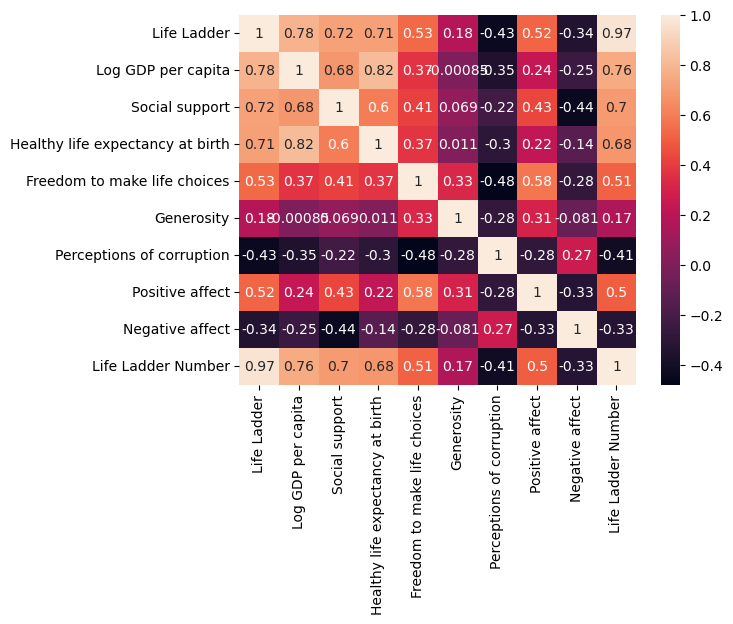

In [8]:
# heatmap of correlations
happy_vars = happy.loc[:,~happy.columns.isin(['Country name','year'])]
corr = happy_vars.corr()
sns.heatmap(corr, annot=True)

In [23]:
# remove na values
cleaned = happy_vars.dropna()

# calculate variance inflation factor of happiness predictors
vif = pd.DataFrame()
features = cleaned.loc[:, ['Log GDP per capita','Healthy life expectancy at birth', 'Generosity','Perceptions of corruption', 'Freedom to make life choices']]
vif['feature'] = features.columns

# store in dataframe
vif["VIF"] = [variance_inflation_factor(features.values, i) 
						for i in range(len(features.columns))] 


# calculate variance inflation factor of happiness response
responses = cleaned.loc[:,['Positive affect','Negative affect','Life Ladder']]

vif_res = pd.DataFrame()
vif_res['feature'] = responses.columns

vif_res["VIF"] = [variance_inflation_factor(responses.values, i) 
						for i in range(len(responses.columns))] 

print("VIF of happiness predictors:\n", vif, "\n")

print("VIF of happiness response variables:\n", vif_res)

VIF of happiness predictors:
                             feature         VIF
0                Log GDP per capita  216.782633
1  Healthy life expectancy at birth  248.965570
2                        Generosity    1.178375
3         Perceptions of corruption   12.645425
4      Freedom to make life choices   36.775542 

VIF of happiness response variables:
            feature        VIF
0  Positive affect  34.138775
1  Negative affect   7.042874
2      Life Ladder  29.471726


Life Ladder is strongly correlated with Log GDP per capita, Social Support, and Life Expectancy as well as being somewhat correlated with Freedom to make choices and Corruption. However, many of the variables strongly correlated with happiness are also strongly correlated with each other (multicollinearity). Therefore, we will select only one to use in our analysis -- Log(GDP). Life ladder, Positive affect, and Negative affect also have high multicollinearity, so we will also select only one to be our response. Life ladder represents the respondent's satisfaction with their life on a scale from 1-10. Therefore, we will use it as the response.

In [13]:
fig1 = alt.Chart(happy_vars).mark_point().encode(
    y = alt.Y("Life Ladder").scale(zero = False), x = alt.X('Log GDP per capita').scale(zero = False))

fig2 = alt.Chart(happy_vars).mark_point().encode(
    y = alt.Y("Life Ladder").scale(zero = False), x = alt.X("Generosity").scale(zero = False))

fig1 | fig2

alt.HConcatChart(...)

The plots above demonstrate a clear linear assocation between log(GDP) and Life Ladder, as well as between life expectancy and Life ladder. Generosity and Life Ladder seem randomly distributed, having little to no association between the two.
#### 2. Estimating Life Ladder Score Using a Linear Model

In [25]:
y = cleaned['Life Ladder'].values
x = cleaned.loc[:, ['Log GDP per capita','Generosity']]

# fit model to predict life ladder
x = sm.tools.add_constant(x)
mlr = sm.OLS(endog = y, exog = x)
rslt = mlr.fit()

# retreive estimates and std errors
coef_tbl = pd.DataFrame({'estimate': rslt.params.values,
              'standard error': np.sqrt(rslt.cov_params().values.diagonal())},
              index = x.columns)

coef_tbl

,estimate,standard error
const,-1.835990,0.123047
Log GDP per capita,0.780644,0.013069
Generosity,1.328312,0.093603


The coefficient estimates from the cell above represent the estimated change in Life Ladder for a 1 unit increase in the corresponding variable. For a 1 unit increase in Log(GDP), Life ladder increases by .78 units. While for a 1 unit increase in generosity, Life ladder increases by 1.32 units. Keep in mind that Generosity is measured on a much smaller scale, so a 1 unit increase is proportionally much larger.

Based on the analysis, wealth is probably the greatest factor in affecting happiness as measured by Life Ladder. Log(GDP), Lifespan, Social Support, and Freedom to make life choices have very high multicollinearity with each other, demonstrating that there is some relationship with each other. My belief is that it's wealth that ties all these things together. Economic prosperity, as measured by GDP, often leads to improvements in individual freedoms, as well as the development of social programs that may improve Social Support and Lifespan. In the data,  6 of the richest by GDP per capita countries in 2022 are also in the top 10 happiest countries by life ladder.

In [14]:
# obtain happiness information for 2022
happy2022 = happy[happy['year'] == 2022].drop("year", axis = "columns").set_index("Country name")

# find happiest and richest countries for comparison
top_10_happy = happy2022.dropna().sort_values(by = "Life Ladder", axis = 0, ascending = False).head(10).index.values
top_10_gdp = happy2022.dropna().sort_values(by = "Log GDP per capita", axis = 0, ascending = False).head(10).index.values

# obtain the intersect
intersect  = [x for x in top_10_happy if x in top_10_gdp]
print(intersect)

['Denmark', 'Iceland', 'Sweden', 'Netherlands', 'Norway', 'Luxembourg']


## Summary of Findings

Our goal was to identify spatiotemporal trends in happiness from 2008 to 2022. Through our analysis, we have determined that on average, happiness is consistent over time. People continue to have positive experiences with similar intensity and frequency over time, but negative experiences have increased since 2008. Certain African countries have shown the highest improvement in happiness over time and countries in North America and Europe demonstrate consistency in their happiness. In addition, we found that GDP has the highest correlation with Life Ladder scores and that the richest countries also tend to be the happiest.